# Assignment 2 - Machine Learning Basics

## Varun Prasad
Netid:  vp60

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
- Understand the bias-variance tradeoff and the impact of model flexibility algorithm performance and model selections

In [1]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
# %config InlineBackend.figure_format = 'retina'

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

1. A flexible model will have *better* performance because of the large sample size. A less flexible model will not capture or fit the data's trends well.

2. A flexible model will have *worse* performance because it may overfit the data due to few samples but many variables.

3. A flexible model will have *better* performance because a model that is highly non-linear needs to have a better fit to reduce bias. More flexible models can be tuned to better capture the data.

4. A flexible model will have *worse* performance because high variance is a characteristic of overfitting the data. Any small changes in the data can drastically affect the model parameters and performance when the variance is high. A flexible model would also overfit to the noise.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

**(a)** This a *regression* problem and we are primarily interested in *inference* because we are seeing how different factors such as number of employees, profit, and industry affect CEO salary, which is a continuous variable. We may be interested in seeing how the salary varies across these different firms but are not trying to predict future CEO salary. The sample size is *500* and there are *3* predictors: number of employees, profit, and industry.  

**(b)** This a *classification* problem because we are interested in determining whether or not a product will be a success or failure, which is a binary variable. We are most interested in *prediction* because we want to use past data to predict how the product will perform in the future. The sample size is *20* and there are
*13* predictors: product price, marketing budget, competition price, and 10 other undisclosed variables.

**(c)** This is a *regression* problem because we want to predict percent change, which is a continuous variable. We are interested in *prediction*, particularly in how change in the US dollar is affected by world stock markets. Since weekly data is collected for a full year, our sample size is *52* and we have *3* predictor variables: the markets of the US, UK, and Germany.  

# Practical Questions

## 3
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [187]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

**ANSWER**:

**(a)** The Euclidean distance to the origin is calculated by the following code and shown in the outputted dataframe. 

In [195]:
# a) Calculate Euclidean distance via matrices
# Create test point
t = np.array([[0,0,0]])

# Subtract t from each row of X 
d = X - t

# Sum the squares of the individual components and take the square root to obtain distances
d = np.sqrt(np.sum(d**2, axis = 1))

# Display combined dataframe
df = pd.DataFrame({'x1':X[:,0],'x2':X[:,1],'x3':X[:,2],'y':y,'distance':d})
df

,x1,x2,x3,y,distance
0,0,3,0,r,3.000000
1,2,0,0,r,2.000000
2,0,1,3,r,3.162278
3,0,1,2,b,2.236068
4,-1,0,1,b,1.414214
5,1,1,1,r,1.732051


The table below shows the exact distance of each observation from the test point (the origin). 

| Obs. |$x_1$ | $x_2$| $x_3$| $y$   | Distance  |
|------|------|------|------|-------|-----------|
| **1**|0     | 3    | 0    | Red   |   3       | 
| **2**|2     | 0    | 0    | Red   |   2       | 
| **3**| 0    | 1    | 3    | Red   |$\sqrt{10}$| 
| **4**| 0    | 1    | 2    | Blue  |$\sqrt{5}$ | 
| **5**| -1   | 0    | 1    | Blue  |$\sqrt{2}$ |  
| **6**| 1    | 1    | 1    | Red   |$\sqrt{3}$ | 

**(b)** When K = 1, the test point will be classified according to the closest neighbor. In this case, the closest neighbor is observation 5, so the test point will be classified as *Blue*.

**(c)** When K = 3, the test point will be classified according to the closest 3 neighbors. The class with the most observations within those 3 samples will be used to classify the test point. In this case, the 3 closest observations are 5, 6, and 2. Obsesrvations 6 and 2 are classifed as Red while observation 5 is classified as Blue. Thus, the test point will be assigned to the *Red* class. 

**(d)** If the Bayes decision boundary is nonlinear, we would expect the optimal K to be small. A very nonlinear boundary indicates a highly flexible model with a large variance. Using a large K is more likely to incorrectly classify the observation.   

## 4
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

**(a)** The commented code for building the classifier is shown below. 

In [196]:
# (a) Write your own kNN classifier
import numpy as np
from scipy import stats

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        pass
        
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x = x
        self.y = y
        
    def predict(self, x_test, k):
        y_hat = [] # Variable to store the estimated class label for 

        # Loop through rows in test set
        for row in x_test:
            # Calculate the distance from each vector in x to the training data
            dist = np.sqrt(np.sum((row - self.x)**2, axis = 1))
            
            # Sort by number of K values and identify corresponding indices
            dist_ind = np.argsort(dist)[0:k]
            
            # Match indices with y_train
            y_ind = self.y[dist_ind]
            
            # Find mode of classification in y_train based on y_ind
            class_mode = stats.mode(y_ind)
            
            # Append classification with greatest number to y_hat
            y_hat.append(class_mode[0].tolist())
            
        # Flatten final list
        y_hat = [result for classes in y_hat for result in classes]
        
        # Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

**(b)** The two datasets were loaded using pandas, as shown in the following code. The dataframes were converted to numpy arrays for proper computation within the classifier function. 

In [197]:
# b) Load datasets
# Import pandas library
import pandas as pd

# Load dataset 1 - "low"
X_train_low = pd.read_csv("A2_X_train_low.csv", header = None).to_numpy()
y_train_low = pd.read_csv("A2_y_train_low.csv", header = None).to_numpy()
X_test_low = pd.read_csv("A2_X_test_low.csv", header = None).to_numpy()
y_test_low = pd.read_csv("A2_y_test_low.csv", header = None).to_numpy()

# Load dataset 2 - "high"
X_train_high = pd.read_csv("A2_X_train_high.csv", header = None).to_numpy()
y_train_high = pd.read_csv("A2_y_train_high.csv", header = None).to_numpy()
X_test_high = pd.read_csv("A2_X_test_high.csv", header = None).to_numpy()
y_test_high = pd.read_csv("A2_y_test_high.csv", header = None).to_numpy()

**(c)** The code for training the classifier with *k* = 5 is shown below. The accuracy was determined to be 92.5% for the low dimensional dataset and 99.3% for the dimensional dataset. Making predictions took 0.22878 and 0.43362 seconds for the low and high dimensions datasets, respectively. These times do vary slightly with each run but are generally less than 0.25 and 0.5 seconds.


In [198]:
# c) Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each
import time 

# "Low" dataset objects
model_low = Knn()
model_low.fit(X_train_low, y_train_low)

# Set timer for prediction and print computation time
t0_low = time.time()
y_hat_low = model_low.predict(X_test_low,5)
t1_low = time.time()
time_low = t1_low - t0_low
print(f'It takes {round(time_low, 5)} seconds to make predictions for the low dimensional dataset')

# Compute and print accuracy
acc_low = accuracy(y_test_low, y_hat_low)
print(f'The KNN classifer is {acc_low*100}% accurate for the "low" dataset')

# "High" dataset objects
model_high = Knn()
model_high.fit(X_train_high, y_train_high)

# Set timer for prediction and print computation time
t0_high = time.time()
y_hat_high = model_high.predict(X_test_high,5)
t1_high = time.time()
time_high = t1_high - t0_high
print(f'It takes {round(time_high, 5)} seconds to make predictions for the high dimensional dataset')

# Compute and print accuracy
acc_high = accuracy(y_test_high, y_hat_high)
print(f'The KNN classifer is {acc_high*100}% accurate for the "high" dataset')

It takes 0.22878 seconds to make predictions for the low dimensional dataset
The KNN classifer is [92.5]% accurate for the "low" dataset
It takes 0.43362 seconds to make predictions for the high dimensional dataset
The KNN classifer is [99.3]% accurate for the "high" dataset


**(d)** The code below shows the performance and accuracy of the scikit-learn library on the dataset. While the accuracies are the same as those from the created model above, the performance is much faster when using the scikit-learn library, though times can vary slightly with each run. 

In [204]:
# d) Use scikit-learn library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create classifier object
knn_model = KNeighborsClassifier(n_neighbors = 5)

# Evaluate time and accuracy on low dataset
knn_model.fit(X_train_low, y_train_low.ravel())
t0_low_knn = time.time()
y_pred_low = knn_model.predict(X_test_low)
t1_low_knn = time.time()
time_low_knn = t1_low_knn - t0_low_knn
acc_low_knn = accuracy_score(y_test_low, y_pred_low)
print(f'It takes {round(time_low_knn, 5)} seconds to make predictions for the low dimensional dataset')
print(f'The sklearn KNN classifer is {round(time_low/time_low_knn,5)} times faster than the model bult from scratch.')
print(f'The sklearn KNN classifer is {acc_low_knn*100}% accurate for the low dimensional dataset')

# Evaluate time and accuracy on high dataset
knn_model.fit(X_train_high, y_train_high.ravel())
t0_high_knn = time.time()
y_pred_high = knn_model.predict(X_test_high)
t1_high_knn = time.time()
time_high_knn = t1_high_knn - t0_high_knn
acc_high_knn = accuracy_score(y_test_high, y_pred_high)
print(f'It takes {round(time_high_knn, 5)} seconds to make predictions for the high dimensional dataset')
print(f'The sklearn KNN classifer is {round(time_high/time_high_knn,5)} times faster than the model bult from scratch.')
print(f'The sklearn KNN classifer is {acc_high_knn*100}% accurate for the high dimensional dataset')

It takes 0.02543 seconds to make predictions for the low dimensional dataset
The sklearn KNN classifer is 8.99531 times faster than the model bult from scratch.
The sklearn KNN classifer is 92.5% accurate for the low dimensional dataset
It takes 0.16441 seconds to make predictions for the high dimensional dataset
The sklearn KNN classifer is 2.63742 times faster than the model bult from scratch.
The sklearn KNN classifer is 99.3% accurate for the high dimensional dataset


**(e)** A prediction process that is slow will use more memory and will be less efficient. As a result, it will be harder to continue evaluating new sets of data, and this could have major consequences for applications that require rapid performance and high accuracy. For example, systems that detect leaks or data breaches need to be extremely fast, and if the prediction process is slow, critical errors cannot be detected in time. It is also possible that the algorithm being used could be overfitting the training data, increasing the variance and reducing generalizability on test data and other future data. A different type of algorithm that better handles continuously updating data would be more useful. 

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

**(a)** The code for creating the synthetic dataset is shown in the following cell. A dataframe is created from the data to help with future sampling and processing of data.  

In [207]:
# a) Create synthetic dataset
# Import library/module
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np

# Generate Dataset
X_train, y_train = make_moons(n_samples = 1000, noise = 0.35)

# Create Pandas dataframe
data_train = pd.DataFrame({'X1': X_train[:,0],'X2': X_train[:,1],'y':y_train})

**(b)** The scatterplot for the data is coded and displayed in the following cells. 

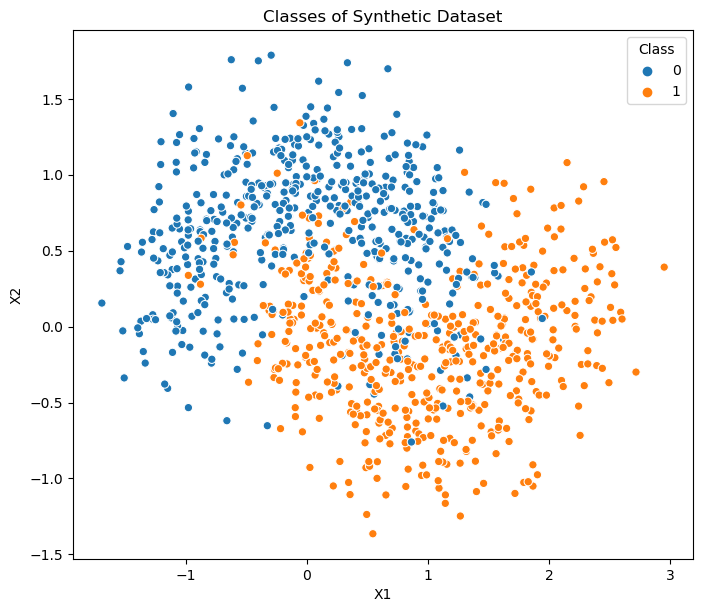

In [208]:
# b) Create scatterplot
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 
plt.figure(figsize = (8,7), dpi = 100);
data_plot = sns.scatterplot(data_train['X1'], data_train['X2'], hue = y_train)
data_plot.set_xlabel('X1')
data_plot.set_ylabel('X2')
data_plot.set_title('Classes of Synthetic Dataset')
data_plot.legend(title = 'Class',loc = 'upper right')
plt.show()

**(c)** A for loop is used to create the specific datasets, shown in the code below. Samples are taken randomly on the original dataframe in part (a), and these dataframes are collected into a list for processing in the for loop. 

In [209]:
# Import sklearn KNN
from sklearn.neighbors import KNeighborsClassifier

# Create 3 random datasets
data_train1 = data_train.sample(100)
data_train2 = data_train.sample(100)
data_train3 = data_train.sample(100)

training_samples = [data_train1, data_train2, data_train3]

**(d)** To create the decision boundary, a meshgrid over the range of the training data is generated. A nested for loop was created to more efficiently fit the 3 KNN classifiers to the 3 datasets. Plots for each of the boundaries were also generated in the for loop. The code below shows this process, which used [this source](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html) as a reference.

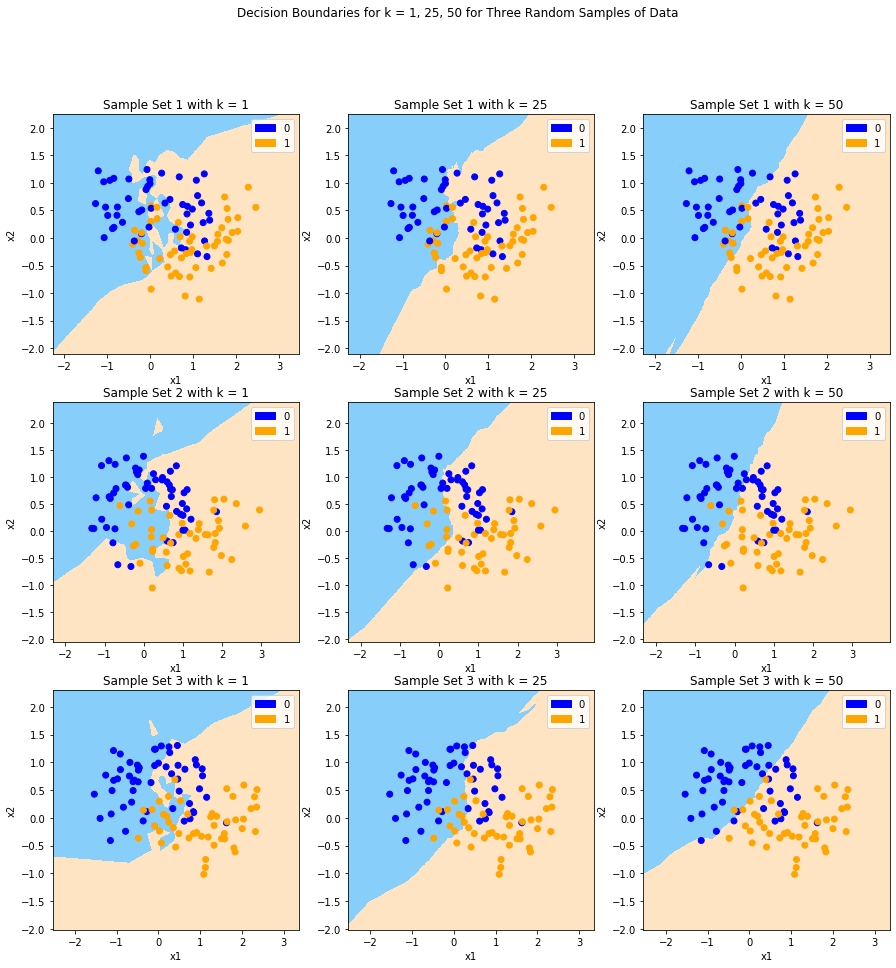

In [210]:
# Import color libraries 
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
cmap_back = ListedColormap(['bisque','lightskyblue'])
cmap_front = ListedColormap(['blue','orange'])

# Set color labels
blue = mpatches.Patch(color='blue', label= '0')
orange = mpatches.Patch(color='orange', label= '1')

# Create k list
k = [1, 25, 50]

# Number of values for meshgrid and plotting
numRows, numCols = 3,3
nvalues = 500

# Create all classifiers and plots using for loop
fig, ax = plt.subplots(numRows, numCols, figsize = (15,15))
fig.suptitle('Decision Boundaries for k = 1, 25, 50 for Three Random Samples of Data')
for i in range(numRows): # Data set
    for j in range(numCols): # k
        # Sample data
        data_sample = training_samples[i][{'X1','X2'}]
        class_sample = training_samples[i]['y']
        # Create knn classifier
        knn = KNeighborsClassifier(n_neighbors = k[j])
        knn_fit = knn.fit(data_sample, class_sample)
        
        # Create meshgrid
        x1_vals = np.linspace(data_sample['X1'].min() - 1, data_sample['X1'].max() + 1, nvalues)
        x2_vals = np.linspace(data_sample['X2'].min() - 1, data_sample['X2'].max() + 1, nvalues)
        xx, yy = np.meshgrid(x1_vals, x2_vals)
        
        # Create decision boundary
        bound = knn_fit.predict(np.c_[xx.ravel(), yy.ravel()])
        bound = bound.reshape(xx.shape)
        
        # Plot data
        ax[i,j].pcolormesh(xx, yy, bound, cmap = cmap_back)
        ax[i,j].scatter(data_sample['X1'], data_sample['X2'], c = class_sample, cmap = cmap_front)
        ax[i,j].set_title(f'Sample Set {i+1} with k = {k[j]}')
        ax[i,j].set_xlabel('x1')
        ax[i,j].set_ylabel('x2')
        ax[i,j].legend(handles = [blue, orange], loc = 'upper right')
        pass
    pass
plt.show()

**(e)** As the value of k increases, the boundary changes less with the data points. This is because higher values of k result in less flexible models, so the decision boundary is not as influenced by individual data points. It can be clearly seen that with a k of 1, the boundary varies most greatly with the data, often leading to isolated patches as shown with Sample Set 3. In addition, depending on the sample of data, the boundaries also change. Sample Set 2 with a k of 25 has a slightly smaller region of classifying 0s compared to Sample Sets 1 and 3. Using a k of 50 leads to the smoothest decision boundary, but this is likely to result in high bias and underfitting of the data. A k of 25 provides the best bias-variance tradeoff for this set of data and classifiers. 

**(f)** The bias-variance tradeoff is critical when using any algorithm, especially KNNs. As shown in the above plots, using a k of 1 results in the least smooth and most sensitive decision boundary. It would not perform well on test data. This classifier would have high variance because it is overfitting the data. Using a k of 50 results in the opposite problem. By incorporating too many points, we would be obtain a high bias by underfitting the data and assuming that so many neighbors are needed for classification. The boundary is very smooth but does not appear to classify the data as well compared to a k of 1 or 25. While a k of 25 is not perfect either, it does provide the best bias-variance balance for this data. It does generally separate the data well and is not easily influenced by individual points. It's possible that using a k of 10 would be better for classifying this data, and we would need to iterate through many k values to find the optimal k. 

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

**(a)** The test dataset is generated via the code below. Training and test error lists are also initialized. 

In [211]:
# Import library/module
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Create test dataset
X_test, y_test = make_moons(n_samples = 1000, noise = 0.35)

# Create Pandas dataframe
data_test = pd.DataFrame({'X1': X_test[:,0],'X2': X_test[:,1],'y':y_test})

# Create list of classification errors (500)
train_error = [0]*500
test_error = [0]*500

**(b)** The training and test errors for each of the 500 classifiers are calculated using a for loop, with the code shown below.

In [212]:
# Loop through k values and test
for k in range(1,501):
    knn = KNeighborsClassifier(n_neighbors = k)
    # Fit and test data
    knn_train_fit = knn.fit(X_train, y_train)
    knn_train_pred = knn.predict(X_train)
    knn_test_pred = knn.predict(X_test)
    
    # Compute error (1 - accuracy)
    train_error[k-1] = 1 - accuracy_score(y_train, knn_train_pred)
    test_error[k-1] = 1 - accuracy_score(y_test, knn_test_pred)

The plot of classification error for the training and test data is shown below. 

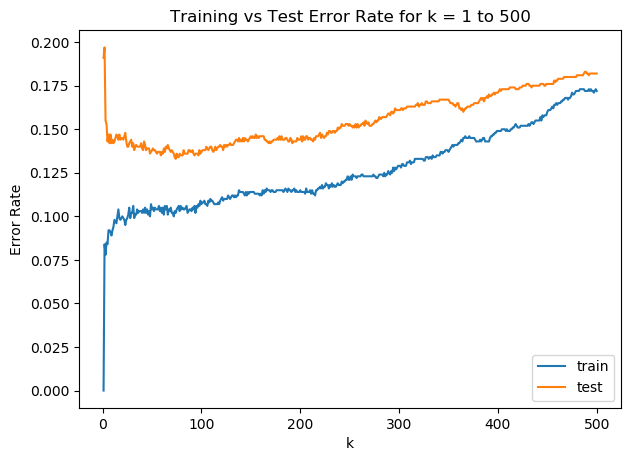

In [213]:
# Plot error trends 
import matplotlib.pyplot as plt
import seaborn as sns

k = range(1,501)
plt.figure(figsize = (7,5), dpi = 100)
sns.lineplot(k, train_error, label = 'train')
sns.lineplot(k, test_error, label = 'test')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.title('Training vs Test Error Rate for k = 1 to 500')
plt.legend()
plt.show()

**(c)** The results above show the train and test error rate rapidly approaching in opposite directions at a low k (around 5-10), with both steadily climbing after this point. The test error shows the expected U-shaped trend. For this data, the test error reaches its mininum at a low k value of approximately 75. Note that the plot can change with repeated runs of the data creation and classification due to the random selection. In some cases, I have seen the test error become lower than the training error at high k.  

**(d)** Lower values of k are more likely to lead to overfitting, which results in higher variance and lower bias. Higher values of k smoothen out the decision boundaries and allow for better generalization. However, k values that are too high can underfit the data, leading to higher bias and a lower variance. 

**(e)** The optimal value of k is the one that minimizes the test error. This allows for maximum generalizability of the model. For the classifiers generated in this problem, the optimal k value was 73, which had a test error of 0.133. As mentioned earlier, these values could change with each run of randomly generated data. 

In [216]:
# Calculate k where test error is minimum
min_k = np.argmin(test_error)
print(min_k)
print(test_error[min_k])

73
0.133


**(f)** For other models such as linear regression, the flexibility is determined by the order of the model. For example, a polynomial model will fit the data better than a strictly linear one. However, higher order models are more likely to lead to overfitting and a higher variance.  

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given training and testing data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

**ANSWER**

**(a)** Prior to creating the model, the data is loaded and the x and y columns are converted to numpy arrays.

In [218]:
# Load data
import pandas as pd
Q7_train = pd.read_csv('A2_Q7_train.csv')
Q7_test = pd.read_csv('A2_Q7_test.csv')

# Use variables for columns
train_x = Q7_train['x'].values
train_y = Q7_train['y'].values

test_x = Q7_test['x'].values
test_y = Q7_test['y'].values

The scatterplot of the training data is shown below. 

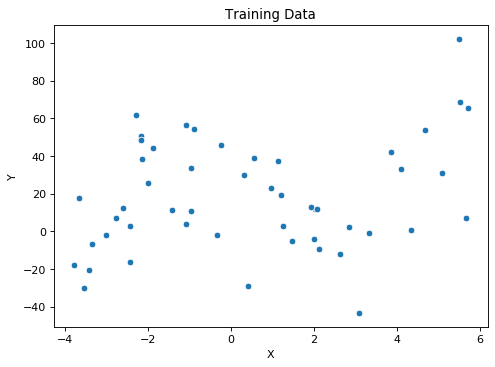

In [261]:
# a) Scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (7,5), dpi = 80)
sns.scatterplot(Q7_train['x'],Q7_train['y']);
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training Data')
plt.show()

**(b)** Using the LinearRegression class in sklearn, a linear regression model was fit to the data. This model had an $R^{2}$ of 0.06486, an MSE of 791.4168, and the following equation: $$y = 17.20493 + 2.59073x$$

In [247]:
# b) Fit Linear Regression Model to training data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and fit model
linreg = LinearRegression()
lin_fit = linreg.fit(train_x.reshape(-1,1),train_y)
train_pred = lin_fit.predict(train_x.reshape(-1,1))

# Scoring
train_R2 = lin_fit.score(train_x.reshape(-1,1),train_y) #R2
train_MSE = mean_squared_error(train_y, train_pred) # MSE
print(f'The R2 for the model on the training data is {train_R2:.5f}')
print(f'The MSE for the model on the training data is {train_MSE:.5f}')

# Model Parameters
print(f'The coefficient of the model is {float(lin_fit.coef_):.5f}')
print(f'The intercept of the model is {lin_fit.intercept_:.5f}')

The R2 for the model on the training data is 0.06486
The MSE for the model on the training data is 791.41675
The coefficient of the model is 2.59073
The intercept of the model is 17.20493


**(c)** Based on the scatterplot in part (a), it seems that a polynomial function can provide a reasonable fit for the data. After some experimentation, a 3rd order polynomial was chosen. Two new columns were made that corresponded to the square and the cube of x. The transformed data was then fit, and the resulting model had an $R^2$ of 0.39364, an MSE of 510.88497, and the following equation: $$y = 24.15543 + 0.89701x - 9.25192x^2 - 2.12569x^3$$

In [258]:
# c) Try transformed model 
# Create columns of transformed variables (x^2 and x^3)
Q7_train_tf = Q7_train.copy()
Q7_train_tf['x^2'] = Q7_train_tf['x']**2
Q7_train_tf['x^3'] = Q7_train_tf['x']**3
train_tf_x = Q7_train_tf[{'x','x^2','x^3'}].values

# Create linear regression model
linreg2 = LinearRegression()
lin_fit2 = linreg2.fit(train_tf_x,train_y)
tf_pred = lin_fit2.predict(train_tf_x)

# Score model
tf_R2 = lin_fit2.score(train_tf_x,train_y)
tf_MSE = mean_squared_error(train_y, tf_pred)
print(f'The R2 for the polynomial model on the training data is {tf_R2:.5f}')
print(f'The MSE for the polynomial model on the training data is {tf_MSE:.5f}')

# Coefficients 
print(f'The coefficients of the model are {np.round(lin_fit2.coef_,5)}')
print(f'The intercept of the model is {lin_fit2.intercept_:.5f}')

The R2 for the transformed model on the training data is 0.39634
The MSE for the transformed model on the training data is 510.88497
The coefficients of the model are [ 0.89701 -9.25192 -2.12569]
The intercept of the model is 24.15543


**(d)** The training data, linear model, and transformed model are shown together in the plot below. The linear model clearly does not fit the data well while the transformed model fits the data much better. 

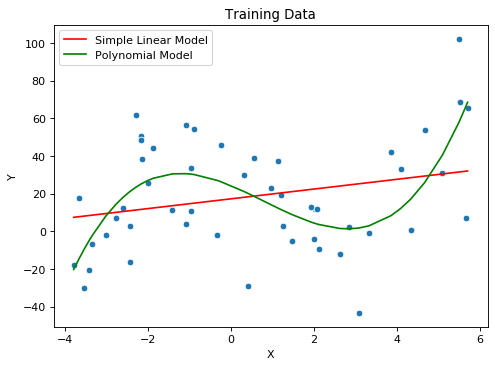

In [262]:
# d) Plot data with models
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (7,5), dpi = 80)
sns.scatterplot(Q7_train['x'],Q7_train['y']);
sns.lineplot(Q7_train['x'],train_pred, color = 'red', label = 'Simple Linear Model')
sns.lineplot(Q7_train['x'],tf_pred, color = 'green', label = 'Polynomial Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training Data')
plt.show()

**(e)** The results of the above models on the test data are shown below. 

In [264]:
# Test data
# Simple linear model
test_pred = lin_fit.predict(test_x.reshape(-1,1))
test_r2 = r2_score(test_y, test_pred)
test_mse = mean_squared_error(test_y, test_pred)
print(f'The R2 for the linear model on the test data is {test_r2:.5f}')
print(f'The MSE for the linear model on the test data is {test_mse:.5f}')

# Transformed model
Q7_test_tf = Q7_test.copy()
Q7_test_tf['x^2'] = Q7_test_tf['x']**2
Q7_test_tf['x^3'] = Q7_test_tf['x']**3
test_tf_x = Q7_test_tf[{'x','x^2','x^3'}].values
test_pred_tf = lin_fit2.predict(test_tf_x)
test_tf_r2 = r2_score(test_y, test_pred_tf)
test_tf_mse = mean_squared_error(test_y, test_pred_tf)
print(f'The R2 for the polynomial model on the test data is {test_tf_r2:.5f}')
print(f'The MSE for the polynomial model on the test data is {test_tf_mse:.5f}')

The R2 for the linear model on the test data is -0.13290
The MSE for the linear model on the test data is 1116.66324
The R2 for the polynomial model on the test data is 0.22945
The MSE for the polynomial model on the test data is 759.50314


**(f)** The $R^{2}$ values for the linear and polynomial model were -0.1329 and 0.22945, respectively, while the MSEs for the linear and polynomial models were 1116.66324 and 759.50314, respectively. The polynomial is clearer much better at fitting the test data as shown by its higher $R^2$ and lower MSE values. More importanly, the higher order of the model makes it more flexible, and if the test data is at all similar to the training data, it is much more likely that the polynomial model would fit the data better. The simple linear model did not fit the training data well so it just as likely if not less likely to fit the training data. 

**(g)** If the test dataset is significantly different from the training dataset, the predictive capability of the model is vastly reduced. The predictive ability of the model depends on how well it can generalize to new data. If given data that is much different from the training data, the model will have highly inaccurate predictions. For example, if a model is trained on data that is linear but given test data that better fits a quadratic model, the model will be highly inaccurate. Thus, it is important for the training and test data to have similarity in order to properly train the model and improve its generalizability to new data.  